In [89]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [90]:
# Load the data as numpy arrays
img_1 = pd.read_csv('./../data/feaSubEImg_1.csv', header=None).to_numpy()
img_2 = pd.read_csv('./../data/feaSubEImg_2.csv', header=None).to_numpy()
overt_1 = pd.read_csv('./../data/feaSubEOvert_1.csv', header=None).to_numpy()
overt_2 = pd.read_csv('./../data/feaSubEOvert_2.csv', header=None).to_numpy()

In [91]:
# Combine the features
img_X = np.hstack((img_1, img_2)).T
img_y = np.array([0] * img_1.shape[1] + [1] * img_2.shape[1])

overt_X = np.hstack((overt_1, overt_2)).T
overt_y = np.array([0] * overt_1.shape[1] + [1] * overt_2.shape[1])

### Plot ROC curve

In [92]:
def plot_roc_curve(y_true, decision_scores, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, decision_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return roc_auc

### Cross-Training function

In [93]:
def cross_train_test_kernel(train_X, train_y, test_X, test_y, C_value, title_prefix="", kernel='linear'):
    # Train SVM
    model = SVC(kernel=kernel, C=C_value)
    model.fit(train_X, train_y)

    # Predict and get decision function
    y_pred = model.predict(test_X)
    decision_scores = model.decision_function(test_X)

    # Accuracy
    acc = accuracy_score(test_y, y_pred)

    # Plot ROC
    roc_auc = plot_roc_curve(test_y, decision_scores, title=f"{title_prefix} ROC Curve ({kernel})")

    return acc, roc_auc

### Testing Trained: Imagined, Tested: Overt

In [94]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
c_value = 0.0001

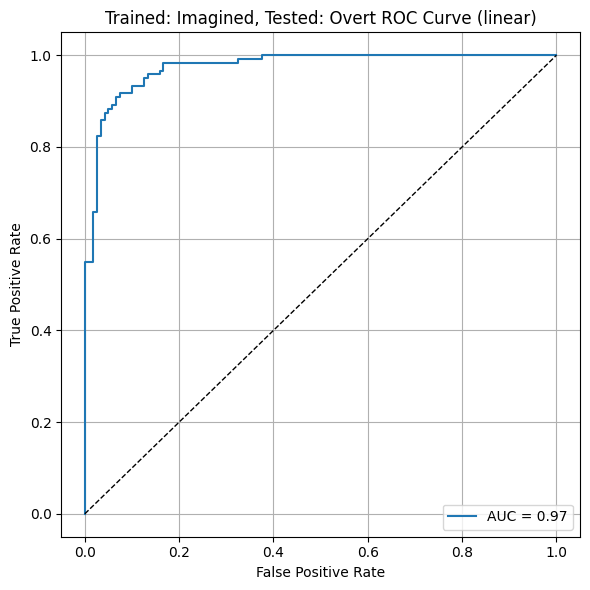

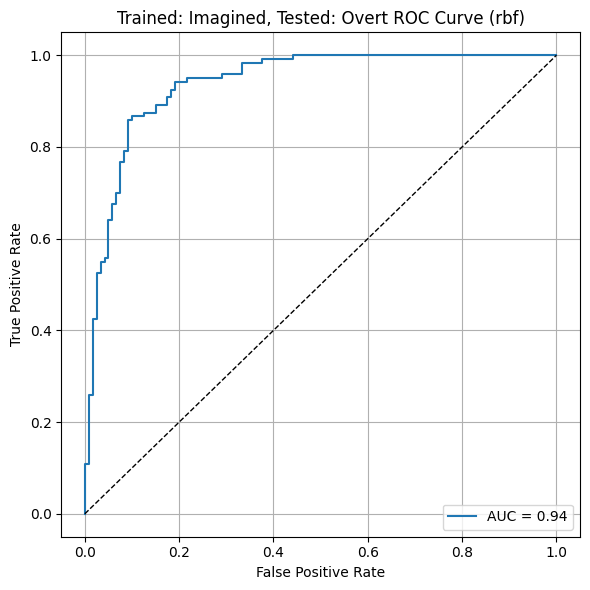

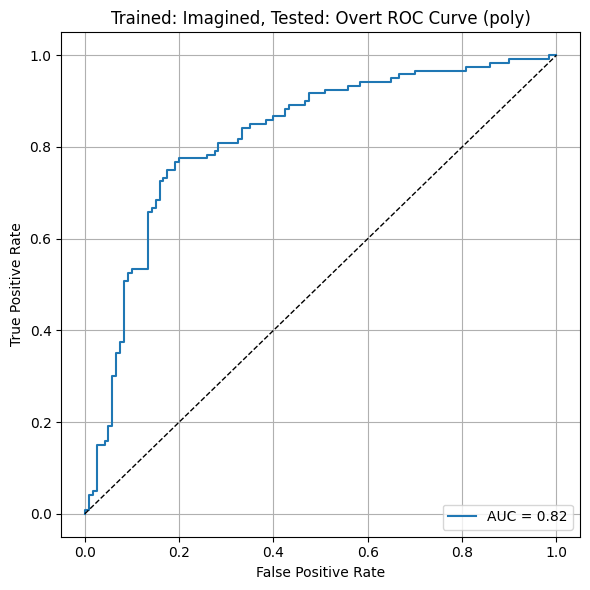

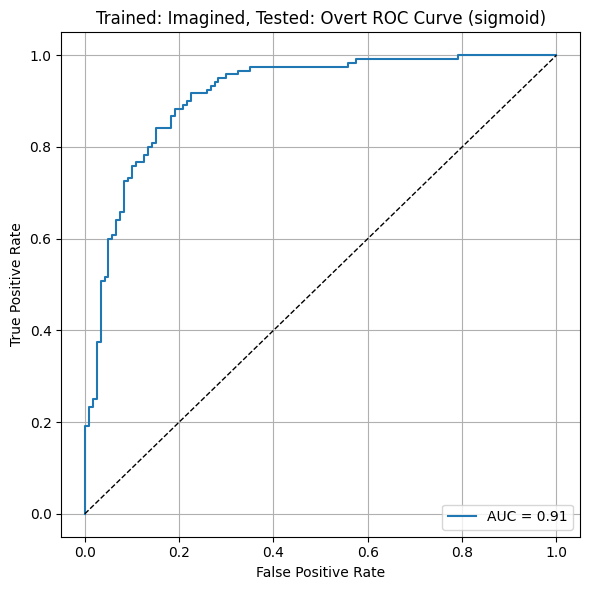

Linear Kernel -> Accuracy: 0.91, AUC: 0.97
Rbf Kernel -> Accuracy: 0.82, AUC: 0.94
Poly Kernel -> Accuracy: 0.50, AUC: 0.82
Sigmoid Kernel -> Accuracy: 0.83, AUC: 0.91


In [95]:
# Dictionary to store accuracy and auc results
acc = {
    'linear': 0.0,
    'rbf': 0.0,
    'poly': 0.0,
    'sigmoid': 0.0
}
roc_auc = {
    'linear': 0.0,
    'rbf': 0.0,
    'poly': 0.0,
    'sigmoid': 0.0
}

for kernel in kernels:
    curr_acc, curr_roc_auc = cross_train_test_kernel(img_X, img_y, overt_X, overt_y, C_value=c_value, title_prefix="Trained: Imagined, Tested: Overt", kernel=kernel)
    acc[kernel] = curr_acc
    roc_auc[kernel] = curr_roc_auc

for kernel in kernels:
    print(f"{kernel.capitalize()} Kernel -> Accuracy: {acc[kernel]:.2f}, AUC: {roc_auc[kernel]:.2f}")

### Testing Trained: Overt, Tested: Imagined

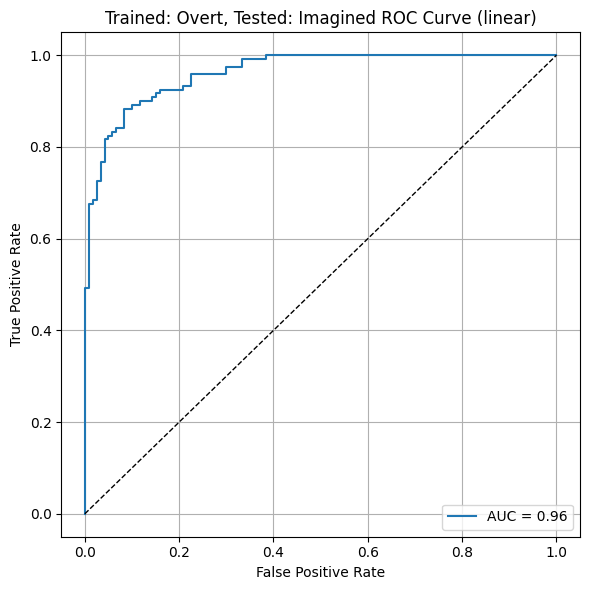

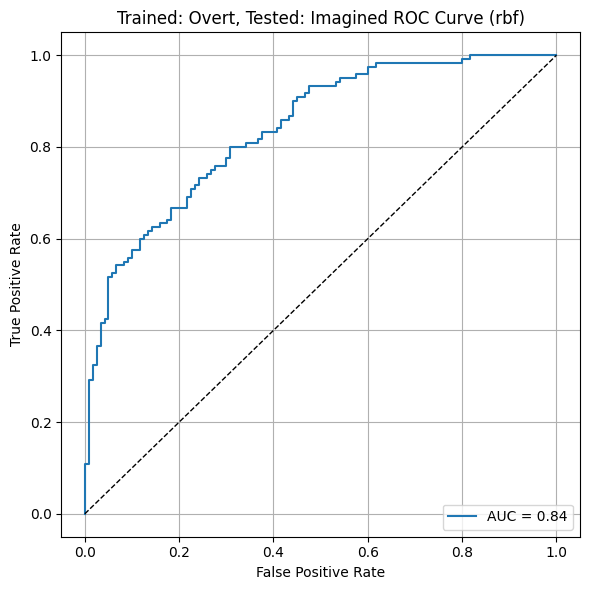

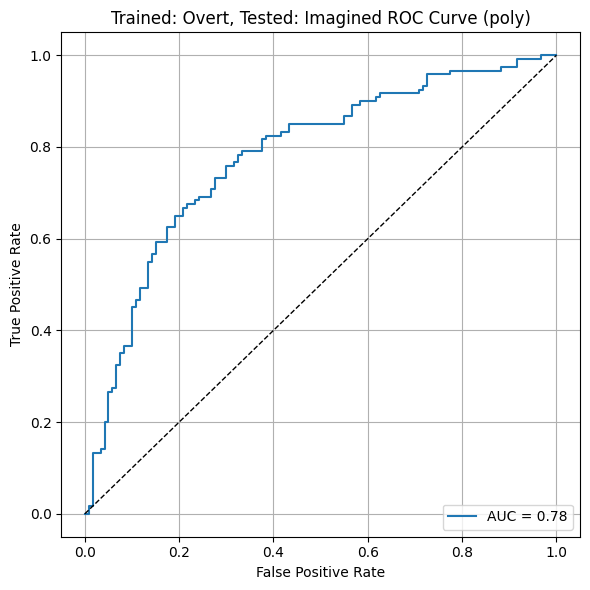

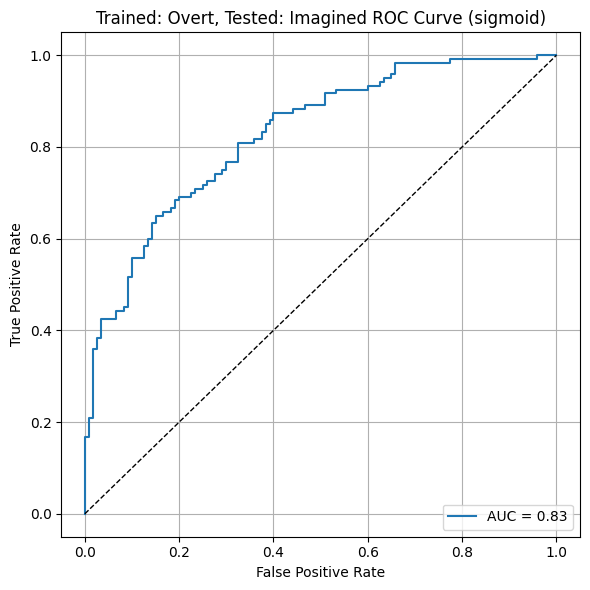

Linear Kernel -> Accuracy: 0.88, AUC: 0.96
Rbf Kernel -> Accuracy: 0.74, AUC: 0.84
Poly Kernel -> Accuracy: 0.69, AUC: 0.78
Sigmoid Kernel -> Accuracy: 0.71, AUC: 0.83


In [96]:
# Dictionary to store accuracy and auc results
acc = {
    'linear': 0.0,
    'rbf': 0.0,
    'poly': 0.0,
    'sigmoid': 0.0
}
roc_auc = {
    'linear': 0.0,
    'rbf': 0.0,
    'poly': 0.0,
    'sigmoid': 0.0
}

for kernel in kernels:
    curr_acc, curr_roc_auc = cross_train_test_kernel(overt_X, overt_y, img_X, img_y, C_value=c_value, title_prefix="Trained: Overt, Tested: Imagined", kernel=kernel)
    acc[kernel] = curr_acc
    roc_auc[kernel] = curr_roc_auc
    
for kernel in kernels:
    print(f"{kernel.capitalize()} Kernel -> Accuracy: {acc[kernel]:.2f}, AUC: {roc_auc[kernel]:.2f}")